Nama : Abdul Azis Al Ayubbi <br> Email : abdulazisalayubbi21@gmail.com


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
print(tf.__version__)

2.17.0


In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [5]:
#dataset direktori
base_dir = 'rockpaperscissors/rps-cv-images/'

In [7]:
# Image data generator with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # Use 40% of the dataset for validation
)

# Prepare train and validation datasets
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
# Define the Sequential model with correct layers
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Ensure we flatten the input before Dense layer

    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=20,  # Adjust epochs as necessary
    verbose=2
)

Epoch 1/20
41/41 - 91s - 2s/step - accuracy: 0.6459 - loss: 0.8122 - val_accuracy: 0.7407 - val_loss: 0.6367
Epoch 2/20
41/41 - 2s - 60ms/step - accuracy: 0.7500 - loss: 0.5999 - val_accuracy: 0.8000 - val_loss: 0.4550
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 - 88s - 2s/step - accuracy: 0.7894 - loss: 0.5305 - val_accuracy: 0.8403 - val_loss: 0.4414
Epoch 4/20
41/41 - 2s - 38ms/step - accuracy: 0.9375 - loss: 0.2388 - val_accuracy: 0.8000 - val_loss: 0.3692
Epoch 5/20
41/41 - 136s - 3s/step - accuracy: 0.8175 - loss: 0.4797 - val_accuracy: 0.7407 - val_loss: 0.5492
Epoch 6/20
41/41 - 1s - 34ms/step - accuracy: 0.8125 - loss: 0.3676 - val_accuracy: 0.6000 - val_loss: 1.2645
Epoch 7/20
41/41 - 141s - 3s/step - accuracy: 0.8300 - loss: 0.4435 - val_accuracy: 0.8866 - val_loss: 0.3619
Epoch 8/20
41/41 - 1s - 34ms/step - accuracy: 0.8438 - loss: 0.4305 - val_accuracy: 0.9000 - val_loss: 0.4441
Epoch 9/20
41/41 - 141s - 3s/step - accuracy: 0.8590 - loss: 0.3740 - val_accuracy: 0.9132 - val_loss: 0.2859
Epoch 10/20
41/41 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0313 - val_accuracy: 0.9000 - val_loss: 0.1790
Epoch 11/20
41/41 - 142s - 3s/step - accuracy: 0.8666 - loss: 0.3512 - val_accuracy: 0.9051 - val_loss: 0.2774
Epoch 12/20
41/41 - 1

Saving images (1).jpeg to images (1).jpeg


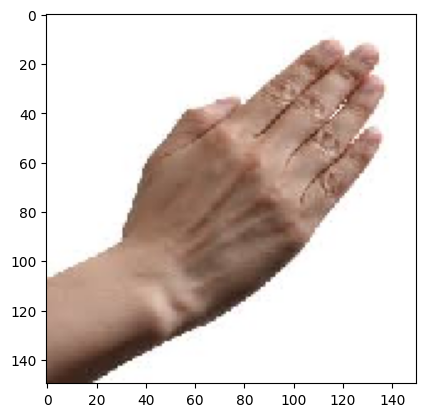

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted probabilities: [9.9993396e-01 6.5367160e-05 7.5235982e-07]
{'paper': 0, 'rock': 1, 'scissors': 2}
Kertas


In [12]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    # Display the uploaded image
    path = fn
    img = image.load_img(path, target_size=(150, 150))  # Target size matches the model input
    imgplot = plt.imshow(img)
    plt.show()  # Add this line to display the image in Colab

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Normalize the image (same as model training)
    x /= 255.0

    # Predict the image
    classes = model.predict(x, batch_size=1)  # No need to stack images, predict directly

    # Print the softmax probabilities
    print(f"Predicted probabilities: {classes[0]}")

    # Get the class with the highest probability
    predicted_class = np.argmax(classes[0])
    class_indices = train_generator.class_indices
    print(class_indices)
    # Display the prediction
    if predicted_class == 0:
        print("Kertas")
    elif predicted_class == 1:
        print("Batu")
    elif predicted_class == 2:
        print("Gunting")
